In [1]:
from emukit.examples.multi_fidelity_dgp.baseline_model_wrappers import NonLinearAutoRegressiveModel
import numpy as np

import matplotlib.pyplot as plt

def f_low(x):
    return np.cos(15.*x)

def f_high(x):
    return x*np.exp(f_low(2.*x-2))-1


num_cheap = 30
num_expensive = 15

np.random.seed(159)
X1 = np.random.rand(num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
X=[]
X.append(X1)
X.append(X2)

Y=[]
Y.append(Yc)
Y.append(Ye)

In [3]:
m1 =  NonLinearAutoRegressiveModel(X, Y)
m1.optimize()

Optimization restart 1/10, f = -56.1373462236668
Optimization restart 2/10, f = -56.13734622374263
Optimization restart 3/10, f = -56.137346223848084
Optimization restart 4/10, f = -56.13734622242351
Optimization restart 5/10, f = -56.13734622373352
Optimization restart 6/10, f = -56.13734622388131
Optimization restart 7/10, f = -56.13734622377203
Optimization restart 8/10, f = -56.13734622339113
Optimization restart 9/10, f = -56.137346223704284
Optimization restart 10/10, f = -56.13734622387188
Optimization restart 1/10, f = 11.840900437613884
Optimization restart 2/10, f = 11.840900437623521
Optimization restart 3/10, f = 11.840900437514852
Optimization restart 4/10, f = 11.840900437697183
Optimization restart 5/10, f = 11.840900437706996
Optimization restart 6/10, f = 11.840900438261826
Optimization restart 7/10, f = 11.8409004462189
Optimization restart 8/10, f = 11.840900437626747
Optimization restart 9/10, f = 11.840900437679888
Optimization restart 10/10, f = 11.840900437525885

In [4]:
X_test = np.linspace(0,1,99)[:,None]

tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
#tmp.shape

X_test = np.hstack((X_test,tmp))

y_mean, y_var = m1.predict(X_test)

In [5]:
y_up = y_mean+1.96*np.sqrt(y_var)
y_down = y_mean - 1.96*np.sqrt(y_var)

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

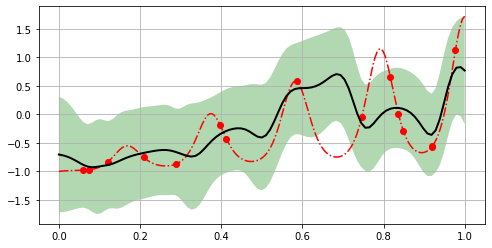

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.grid()
plt.show()

In [7]:
fig.savefig('nonlinearB_NARGP.pdf', bbox_inches='tight')